In [ ]:
#pip install pmdarima #install dulu jika anda belum memiliki pmdarima

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pmdarima as pm

In [186]:
path = 'https://docs.google.com/spreadsheets/d/1kbzBK3Yy-dmt0d7luAe6mzp8y-HvUxT6/edit?usp=drive_link&ouid=115155556122012653943&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?export=download&id=' + path.split('/')[-2]
data = pd.read_excel(url, sheet_name='world')
data.head()

,Tahun,Persentase Hutan
0,1992,32.511019
1,1993,32.454852
2,1994,32.397153
3,1995,32.337258
4,1996,32.276722


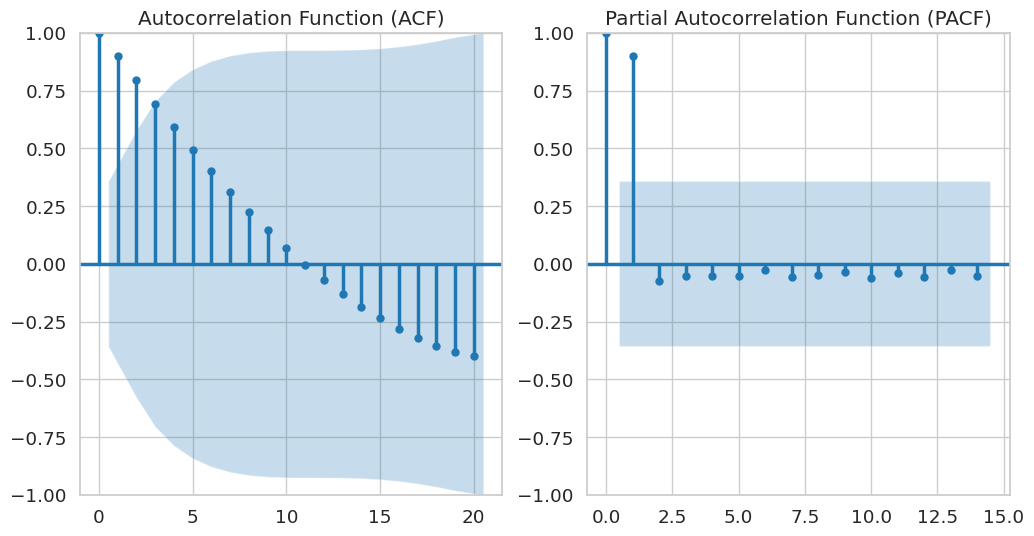

In [190]:
# Konversi Ke DataFrame
df = pd.DataFrame(data)

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(df['Persentase Hutan'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
# PACF
plt.subplot(122)
plot_pacf(df['Persentase Hutan'], lags=14, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [ ]:
# Model untuk mencari Nilai ARIMA (P,D,Q) Terbaik Menggunakan auto_arima
model = pm.auto_arima(df['Persentase Hutan'], start_p=1, start_q=1,
                      test='adf',       # Gunakan adf test untuk menemukan nilai optimal d
                      max_p=5, max_q=5, # Nilai Maksimum P dan Q (settings 5)
                      m=1,              # jumlah series
                      d=None,
                      seasonal=False,   # Bukan Data Seasonal
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Forecast hingga 2030
forecast, conf_int = model.predict(n_periods=10, return_conf_int=True)

# Gabungkan forecast dengan data asli
forecast_years = list(range(1991, 2031))
forecast_values = np.concatenate([df['Persentase Hutan'].values, forecast])

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-141.877, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-145.833, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-156.329, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-143.525, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-151.419, Time=0.79 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-152.451, Time=0.82 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-152.013, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 2.348 seconds


--2024-10-05 13:07:56--  https://github.com/google/fonts/raw/main/ofl/barlowsemicondensed/BarlowSemiCondensed-Regular.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/barlowsemicondensed/BarlowSemiCondensed-Regular.ttf [following]
--2024-10-05 13:07:56--  https://raw.githubusercontent.com/google/fonts/main/ofl/barlowsemicondensed/BarlowSemiCondensed-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105776 (103K) [application/octet-stream]
Saving to: ‘BarlowSemiCondensed-Regular.ttf’

BarlowSemiCondensed 100%[===================>] 103.30K  --.-KB/s    in 0.002s 

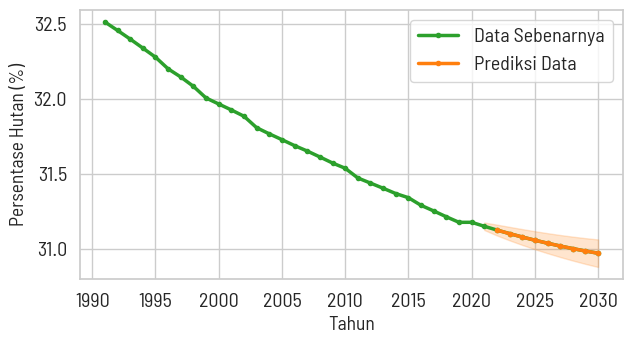

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Step 1: Download Data
!wget -O BarlowSemiCondensed-Regular.ttf https://github.com/google/fonts/raw/main/ofl/barlowsemicondensed/BarlowSemiCondensed-Regular.ttf

# Step 2: Pilih Font yang match dengan infografis
barlow_font = FontProperties(fname='BarlowSemiCondensed-Regular.ttf')

sns.set_style("whitegrid")

actual_color = '#2ca02c'  # Hijau untuk data sebenarnya
forecast_color = '#ff7f0e'  # Oren untuk prediksi
title_fontsize = 14
label_fontsize = 14
tick_fontsize = 11
legend_fontsize = 11

# Sesuaikan ukuran
plt.figure(figsize=(7, 3.5))

# Plot data sebenarnya
plt.plot(forecast_years, forecast_values, marker='.', linestyle='-', color=actual_color, label="Data Sebenarnya")

# Highlight forecast data
plt.plot(forecast_years[31:], forecast_values[31:], marker='.', linestyle='-', color=forecast_color, label="Prediksi Data")

# Tambahkan label
plt.xlabel("Tahun", fontsize=label_fontsize, fontproperties=barlow_font)
plt.ylabel("Persentase Hutan (%)", fontsize=label_fontsize, fontproperties=barlow_font)

# Ubah ukuran ketebalan garis
plt.xticks(fontsize=tick_fontsize, fontproperties=barlow_font)
plt.yticks(fontsize=tick_fontsize, fontproperties=barlow_font)
plt.grid(True)

# Highlight forecast
plt.fill_between(forecast_years[-10:], conf_int[:, 0], conf_int[:, 1], color=forecast_color, alpha=0.2)

# Tambahkan judul
plt.legend(fontsize=legend_fontsize, loc='upper right', prop=barlow_font)

# Save plot
plt.savefig("tes1.png", dpi=300, bbox_inches='tight')

# Tunjukkan Plot
plt.show()
